# Interpretation on the extracted primary studies:

In [8]:
import pandas as pd

excel_file = 'data/merged-data-extraction-form.xlsx'
# xl_file = pd.ExcelFile(excel_file)
# dfs = {sheet_name: xl_file.parse(sheet_name) 
#           for sheet_name in xl_file.sheet_names}

df = pd.read_excel(excel_file, sheet_name='merged')
# df.to_csv('data.csv')

In [9]:
# Columns: 'Unnamed: 93' and 'Unnamed: 96' are merged title and abstract columns.
df['Unnamed: 96'] = df['Unnamed: 96'].str.lower() 

df_primary = df[df['Unnamed: 96']=='yes'].reset_index(drop=True)
print('Shape of the selected primary studies: ', df_primary.shape)
df_primary.head(3)

Shape of the selected primary studies:  (41, 133)


,Key,library,Item Type,Pub. Year,Author,Title,Publication Title,ISBN,ISSN,DOI,...,Unnamed: 123,Maintenance & support,Unnamed: 125,Unnamed: 126,Limitations of the paper/article,Unnamed: 128,Unnamed: 129,Future work,Unnamed: 131,Unnamed: 132
0,PCWGSUJM,IEEExplore,conferencePaper,2019.0,"Begel, Andrew",Best practices for engineering AI-Infused appl...,2019 IEEE/ACM joint 7th international workshop...,NaN,NaN,10.1109/CESSER-IP.2019.00008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EHUCHNYD,IEEExplore,journalArticle,2021.0,"Gutierrez, Tamara; Bergel, Alexandre; Gonzalez...",Systematic fuzz testing techniques on a nanosa...,"IEEE access : practical innovations, open solu...",NaN,2169-3536,10.1109/ACCESS.2021.3104283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MPHUEFRQ,IEEExplore,journalArticle,2021.0,"Alnafessah, Ahmad; Gias, Alim Ul; Wang, Runan;...",Quality-aware DevOps research: Where do we stand?,"IEEE access : practical innovations, open solu...",NaN,2169-3536,10.1109/ACCESS.2021.3064867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,There is a need for a more advanced researches...,NaN,NaN


# Yearly distributed on the queried studies:

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Number of Studies'),
 Text(0.5, 1.0, 'Distribution of the Queried Studies by Year')]

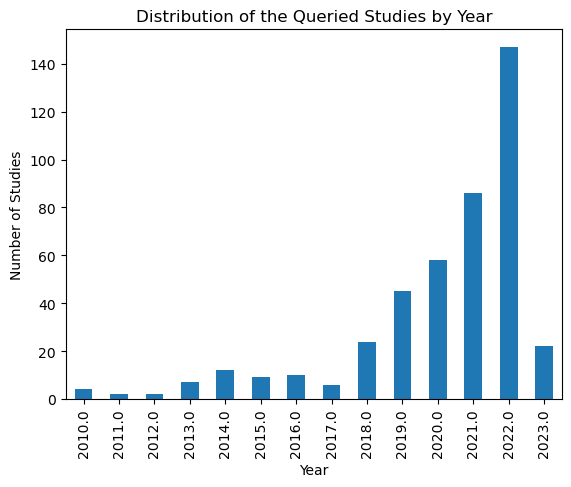

In [10]:
ax = df['Pub. Year'].value_counts().sort_index().plot.bar()
ax.set(xlabel='Year', ylabel='Number of Studies', title='Distribution of the Queried Studies by Year') 

# Yearly distributed on the selected studies:

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Number of Studies'),
 Text(0.5, 1.0, 'Distribution of the Queried Studies by Year')]

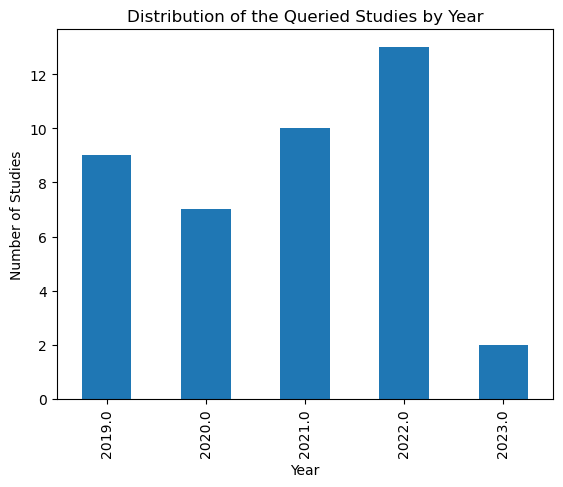

In [11]:
ax = df_primary['Pub. Year'].value_counts().sort_index().plot.bar()
ax.set(xlabel='Year', ylabel='Number of Studies', title='Distribution of the Queried Studies by Year') 

In [12]:
def save_primary(df_primary, df):
    """ add index row to the primary data sheet from the original dataset, 
    because it was removed while selecting only 'Yes' values. 
    """
    if pd.isna(df_primary.Key[0]):
        return df_primary
    else:
        df_new = df_primary.copy()
        df_new.loc[0] = list(df.iloc[0]) # This line was: df_new.loc[-1] = list(df.iloc[0]) but with errors
        df_new.index  = df_primary.index + 1
        df_new = df_new.sort_index()
        df_new.to_excel('data/primary_copy.xlsx') # do not name it primary.excel, otherwise it would place the file
        return df_new

df_primary = df_primary.sort_index()

# run this once
save_primary(df_primary, df).head(5)

,Key,library,Item Type,Pub. Year,Author,Title,Publication Title,ISBN,ISSN,DOI,...,Unnamed: 123,Maintenance & support,Unnamed: 125,Unnamed: 126,Limitations of the paper/article,Unnamed: 128,Unnamed: 129,Future work,Unnamed: 131,Unnamed: 132
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Merged,Gebremariam,Guru,Merged,Gebremariam,Guru,Merged,Gebremariam,Guru,Merged
2,EHUCHNYD,IEEExplore,journalArticle,2021.0,"Gutierrez, Tamara; Bergel, Alexandre; Gonzalez...",Systematic fuzz testing techniques on a nanosa...,"IEEE access : practical innovations, open solu...",NaN,2169-3536,10.1109/ACCESS.2021.3104283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MPHUEFRQ,IEEExplore,journalArticle,2021.0,"Alnafessah, Ahmad; Gias, Alim Ul; Wang, Runan;...",Quality-aware DevOps research: Where do we stand?,"IEEE access : practical innovations, open solu...",NaN,2169-3536,10.1109/ACCESS.2021.3064867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,There is a need for a more advanced researches...,NaN,NaN
4,463PKMZF,IEEExplore,conferencePaper,2021.0,"Vakkuri, Ville; Kemell, Kai-Kristian; Abrahams...",Technical briefing: Hands-on session on the de...,2021 IEEE/ACM 43rd international conference on...,NaN,NaN,10.1109/ICSE-Companion52605.2021.00142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,YLFWK9GQ,IEEExplore,conferencePaper,2022.0,"Moreschini, Sergio; Lomio, Francesco; Hästback...",MLOps for evolvable AI intensive software systems,2022 IEEE international conference on software...,NaN,NaN,10.1109/SANER53432.2022.00155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
